## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For cleaner output in the notebook
%matplotlib inline

# Optional: configure display settings for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## Load the Parquet File

In [2]:
# Path to your local Parquet file
parquet_file_path = r"C:\Users\anujp\Desktop\Data-Visualization-Final-Project\data\UserBehavior\user_behavior_sample_10000.parquet"

# Read the Parquet file into a Pandas DataFrame
df = pd.read_parquet(parquet_file_path)

# Check basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 62836479 to 61483890
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserID        10000 non-null  int64 
 1   ItemID        10000 non-null  int64 
 2   CategoryID    10000 non-null  int64 
 3   BehaviorType  10000 non-null  object
 4   Timestamp     10000 non-null  object
dtypes: int64(3), object(2)
memory usage: 468.8+ KB


## Display Basic DataFrame Stats

In [3]:
# Look at the first few rows
display(df.head())

# Summary statistics for numeric columns
display(df.describe())

# Check the shape (rows, columns)
print("DataFrame shape:", df.shape)

# Check if there are any missing values in each column
print("Missing values:\n", df.isnull().sum())


,UserID,ItemID,CategoryID,BehaviorType,Timestamp
62836479,643062,371178,4801426,pv,2017-11-30 22:16:45
61351116,564028,1339061,2355072,pv,2017-11-29 23:10:54
1933820,184294,1368068,2735466,pv,2017-11-25 12:09:52
3585790,26973,487612,2465336,pv,2017-11-27 08:15:09
28853497,690287,2225060,344833,pv,2017-11-28 15:55:30


,UserID,ItemID,CategoryID
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.048674e+05,2.578699e+06,2.700685e+06
std,2.933970e+05,1.493778e+06,1.479242e+06
min,4.000000e+00,7.570000e+02,4.907000e+03
25%,2.502788e+05,1.269968e+06,1.320293e+06
50%,5.048520e+05,2.620062e+06,2.678261e+06
75%,7.549710e+05,3.871257e+06,4.145813e+06
max,1.017861e+06,5.161884e+06,5.147460e+06


DataFrame shape: (10000, 5)
Missing values:
 UserID          0
ItemID          0
CategoryID      0
BehaviorType    0
Timestamp       0
dtype: int64


Examine Columns and Data Types

In [4]:
# Print a few sample CategoryIDs
print(df["CategoryID"].unique()[:10])

[4801426 2355072 2735466 2465336  344833 2210612 2520771 2629787 4743234
 1051370]


In [5]:
print("Columns and Data Types:")
print(df.dtypes)

# If Timestamp is not already datetime, convert it
if not pd.api.types.is_datetime64_any_dtype(df["Timestamp"]):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s', origin='unix', errors='coerce')
    # Adjust as needed if your timestamp column is not in standard Unix seconds.
    # If it's already in datetime format, this step is optional.
    
# Confirm the column type after conversion
print("\nAfter conversion, Timestamp dtype:", df["Timestamp"].dtype)

Columns and Data Types:
UserID           int64
ItemID           int64
CategoryID       int64
BehaviorType    object
Timestamp       object
dtype: object

After conversion, Timestamp dtype: datetime64[ns]


 Unique values

In [6]:
print("\nUnique values in CategoryID:")
print("nUnique count in CategoryID:",(df["CategoryID"].nunique()))

print("\nUnique values in ItemID:")
print("Unique count in ItemID",(df["ItemID"].nunique()))

print("\nUnique values in UserID:")
print("Unique count in UserID",(df["UserID"].nunique()))




Unique values in CategoryID:
nUnique count in CategoryID: 1596

Unique values in ItemID:
Unique count in ItemID 9658

Unique values in UserID:
Unique count in UserID 9915


## Basic Distributions & Value Counts

### Distribution of Behavior Types

BehaviorType value counts:
 BehaviorType
pv      8924
cart     580
fav      285
buy      211
Name: count, dtype: int64


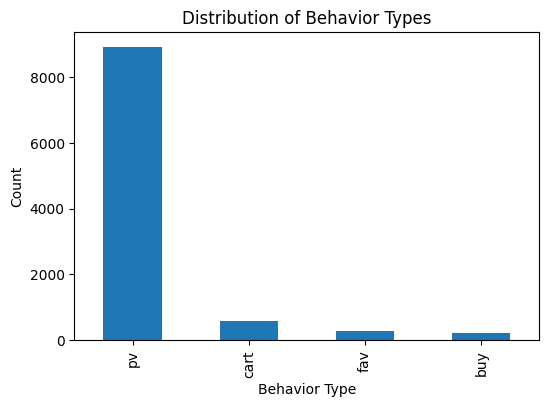

In [7]:
behavior_counts = df["BehaviorType"].value_counts()
print("BehaviorType value counts:\n", behavior_counts)

plt.figure(figsize=(6, 4))
behavior_counts.plot(kind='bar')
plt.title("Distribution of Behavior Types")
plt.xlabel("Behavior Type")
plt.ylabel("Count")
plt.show()


### Top Categories by Frequency

Number of unique categories: 1596

Top 10 most frequent CategoryIDs:
CategoryID
4756105    520
4145813    363
2355072    326
3607361    311
982926     290
2520377    224
4801426    210
1320293    197
2465336    161
3002561    148
Name: count, dtype: int64


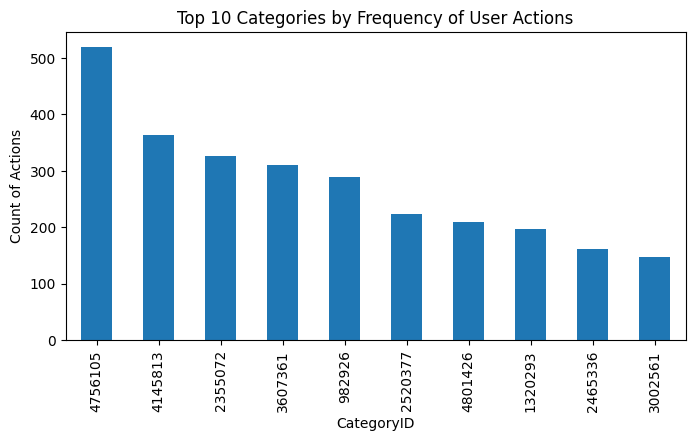

In [8]:
category_counts = df["CategoryID"].value_counts()

print("Number of unique categories:", df["CategoryID"].nunique())
print("\nTop 10 most frequent CategoryIDs:")
print(category_counts.head(10))

plt.figure(figsize=(8, 4))
category_counts.head(10).plot(kind='bar')
plt.title("Top 10 Categories by Frequency of User Actions")
plt.xlabel("CategoryID")
plt.ylabel("Count of Actions")
plt.show()


### Top Items by Frequency

Number of unique items: 9658

Top 10 most frequent Items:
ItemID
812879     6
3403645    5
2032668    4
140359     4
138964     4
1962765    4
2167765    4
3330337    4
4449961    4
987143     4
Name: count, dtype: int64


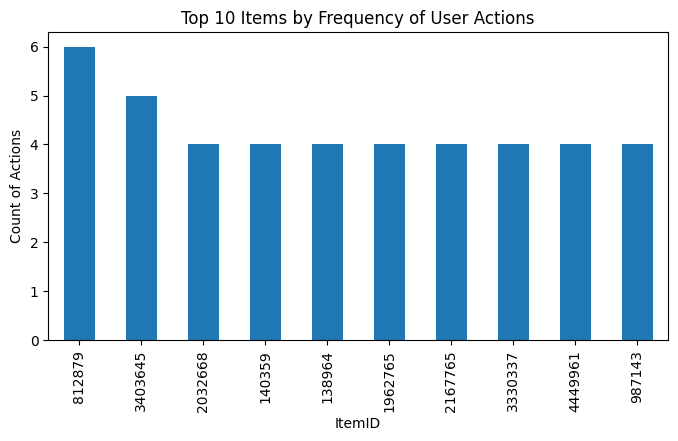

In [9]:
item_counts = df["ItemID"].value_counts()

print("Number of unique items:", df["ItemID"].nunique())
print("\nTop 10 most frequent Items:")
print(item_counts.head(10))

plt.figure(figsize=(8, 4))
item_counts.head(10).plot(kind='bar')
plt.title("Top 10 Items by Frequency of User Actions")
plt.xlabel("ItemID")
plt.ylabel("Count of Actions")
plt.show()

## Time-Based Analysis

### Create Time Features

In [10]:
df = pd.read_parquet(parquet_file_path)
print("Raw Timestamp dtype:", df["Timestamp"].dtype)
print("Sample values:", df["Timestamp"].head())

Raw Timestamp dtype: object
Sample values: 62836479    2017-11-30 22:16:45
61351116    2017-11-29 23:10:54
1933820     2017-11-25 12:09:52
3585790     2017-11-27 08:15:09
28853497    2017-11-28 15:55:30
Name: Timestamp, dtype: object


In [ ]:
# convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')  # no deprecated args

# Check for successful conversion
print("Converted Timestamp dtype:", df["Timestamp"].dtype)
print("Missing values after conversion:", df["Timestamp"].isna().sum())

# 🔁 Proceed only if timestamps are valid
if df["Timestamp"].notna().any():
    # Extract date components
    df["date"] = df["Timestamp"].dt.date
    df["hour"] = df["Timestamp"].dt.hour
    df["day_of_week"] = df["Timestamp"].dt.dayofweek

    # Count actions per date
    date_counts = df["date"].value_counts().sort_index()

    # Print date range
    print("📅 Date range:", df["date"].min(), "to", df["date"].max())

    # 📊 Plot
    plt.figure(figsize=(10, 5))
    date_counts.plot(kind='bar', color='skyblue')
    plt.title("Number of User Actions by Date")
    plt.xlabel("Date")
    plt.ylabel("Count of Actions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No valid timestamps found. Please check the data again.")

### Hourly Pattern

In [ ]:
# Cell 9

hour_counts = df["hour"].value_counts().sort_index()
print("Hourly distribution of actions:")
print(hour_counts)

plt.figure(figsize=(8, 4))
hour_counts.plot(kind='bar')
plt.title("Number of User Actions by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Count of Actions")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by weekday and hour
heatmap_data = df.groupby(["day_of_week", "hour"]).size().unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=False)
plt.title("User Activity Heatmap: Hour of Day vs Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.tight_layout()
plt.show()


### Behavior Type by Hour

In [ ]:
# Cell 10

# Group by hour and behavior
hour_behavior = df.groupby(["hour", "BehaviorType"]).size().unstack(fill_value=0)

print(hour_behavior.head(24))  # Just to see the first 24 rows if you have that many hours
hour_behavior.plot(kind='line', figsize=(10, 6))
plt.title("User Actions by Hour and Behavior Type")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Actions")
plt.legend(title="BehaviorType")
plt.show()


## Funnel Analysis (High-Level)

In [ ]:
# Cell 11

# We want to see the ratio of buy actions to pv actions, or cart to pv, etc.
behavior_totals = df["BehaviorType"].value_counts()
pv_count = behavior_totals.get("pv", 0)
cart_count = behavior_totals.get("cart", 0)
fav_count = behavior_totals.get("fav", 0)
buy_count = behavior_totals.get("buy", 0)

print("Total Page Views (pv):", pv_count)
print("Total Cart Adds (cart):", cart_count)
print("Total Favorites (fav):", fav_count)
print("Total Purchases (buy):", buy_count)

# Quick funnel ratio from pv -> cart -> buy
if pv_count > 0:
    pv_to_cart_ratio = cart_count / pv_count
    pv_to_buy_ratio = buy_count / pv_count
    print(f"\nRatio of cart to pv: {pv_to_cart_ratio:.4f}")
    print(f"Ratio of buy to pv: {pv_to_buy_ratio:.4f}")

if cart_count > 0:
    cart_to_buy_ratio = buy_count / cart_count
    print(f"\nRatio of buy to cart: {cart_to_buy_ratio:.4f}")


### Checking for Duplicates

In [ ]:
# Cell 12

# Some raw event logs can have duplicates
duplicate_rows = df.duplicated().sum()
print("Number of duplicated rows:", duplicate_rows)

# If you want to remove duplicates:
# df.drop_duplicates(inplace=True)
